<a href="https://colab.research.google.com/github/1000PunchMan/DA_Python/blob/main/mini_project_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Имеются следующие данные о транзакциях в период с 01.12.2010 по 12.09.2011:  
InvoiceNo – номер транзакции  
StockCode – код товара  
Description – описание товара  
Quantity – количество единиц товара, добавленных в заказ  
InvoiceDate – дата транзакции   
UnitPrice – цена за единицу товара  
CustomerID – id клиента  
Country – страна, где проживает клиент  
Импортируйте данные data.csv.zip (в папке) с кодировкой ISO-8859-1. Запишите полученный датафрейм в retail, а названия колонок сохраните в переменную retail_columns.  

2) Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество. Если они есть, то удалите их из retail.  

3) ⭐️Задание со звёздочкой!⭐️  
Данные содержат в себе записи как и об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, в начале номера транзакции (InvoiceNo) ставится C (canceled).   
Сколько всего заказов отменили пользователи?  

4) Теперь отфильтруйте данные и оставьте в retail только те заказы, где Quantity > 0. В качестве ответа укажите число оставшихся строк.  

5) 💀 Сложное задание! 💀  
Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id). Идентификатор заказа – InvoiceNo. Для каждого заказа в данных может встречаться более 1 строки.

6) ⭐️Задание со звёздочкой!⭐️  
Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в top_retail_germany.  

7) Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? 
Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.  

8) Вернемся к анализу полного датасета retail. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.  

9) Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)  


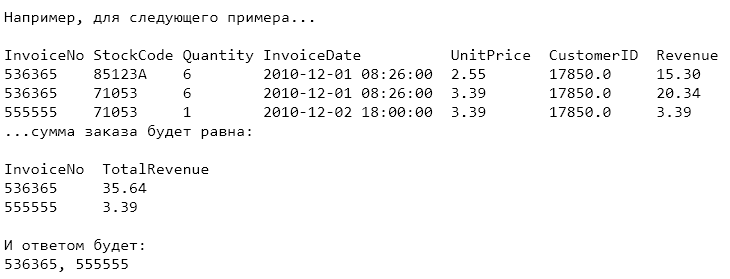

In [ ]:
import pandas as pd

https://drive.google.com/file/d/1QF4ZYtOFs2ndKm9M_9vIODpcSzTUBFUn/view?usp=sharing

In [ ]:
!gdown --id 1QF4ZYtOFs2ndKm9M_9vIODpcSzTUBFUn

Downloading...
From: https://drive.google.com/uc?id=1QF4ZYtOFs2ndKm9M_9vIODpcSzTUBFUn
To: /content/data.csv
100% 45.6M/45.6M [00:00<00:00, 109MB/s] 


**Импортируйте данные data.csv.zip (в папке) с кодировкой ISO-8859-1. Запишите полученный датафрейм в retail, а названия колонок сохраните в переменную retail_columns.**

In [ ]:
retail = pd.read_csv('/content/data.csv',
                 encoding = 'ISO-8859-1')

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
retail_columns = retail.columns

In [ ]:
retail_columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**2) Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество. Если они есть, то удалите их из retail.**

In [ ]:
retail.duplicated().sum()

5268

In [ ]:
retail.drop_duplicates(inplace = True)

In [ ]:
retail.duplicated().sum()

0

**3) ⭐️Задание со звёздочкой!⭐️
Данные содержат в себе записи как и об успешных транзакциях, так и об отмененных. Если пользователь отменил заказ, в начале номера транзакции (InvoiceNo) ставится C (canceled).
Сколько всего заказов отменили пользователи?**

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
row = retail.InvoiceNo

In [ ]:
row

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 536641, dtype: object

In [ ]:
result= []
for i in row:
  if 'C' in i:
    result.append(i)

In [ ]:
len(result)

9251

**4) Теперь отфильтруйте данные и оставьте в retail только те заказы, где Quantity > 0. В качестве ответа укажите число оставшихся строк.**

In [ ]:
retail = retail.query('Quantity > 0')

In [ ]:
retail.shape[0]

526054

**5) 💀 Сложное задание! 💀
Посчитайте число заказов для каждого пользователя (CustomerID) из Германии (Germany). Оставьте только тех, кто совершил более N транзакций (InvoiceNo), где N – 80% процентиль. Запишите полученные id пользователей в germany_top (не весь датафрейм, только id). Идентификатор заказа – InvoiceNo. Для каждого заказа в данных может встречаться более 1 строки.**

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
german = retail.query('Country == "Germany"').groupby('CustomerID',as_index=False).agg({'InvoiceNo':pd.Series.nunique}). \
         rename(columns=({'InvoiceNo':'cnt'}))


In [ ]:
german.describe()

,CustomerID,cnt
count,94.000000,94.000000
mean,12706.829787,4.861702
std,392.019712,5.908989
min,12426.000000,1.000000
25%,12520.250000,1.000000
50%,12606.000000,3.000000
75%,12664.250000,5.000000
max,14335.000000,32.000000


In [ ]:
top_clients = german.query('cnt > cnt.quantile(0.8)').sort_values(by = 'cnt', ascending = False)

In [ ]:
germany_top = top_clients.CustomerID

**6) ⭐️Задание со звёздочкой!⭐️
Используя объект с id пользователей (germany_top), полученный на предыдущем шаге, отфильтруйте наблюдения и оставьте в данных записи только по интересующим нас юзерам. Результирующий датафрейм запишите в top_retail_germany.**

In [ ]:
germany_top

37    12569.0
3     12471.0
83    12720.0
52    12621.0
6     12474.0
79    12709.0
81    12712.0
64    12647.0
16    12500.0
8     12476.0
69    12662.0
12    12481.0
44    12600.0
78    12708.0
51    12619.0
56    12626.0
77    12705.0
26    12524.0
Name: CustomerID, dtype: float64

In [ ]:
top_retail_germany = retail.query('CustomerID in @germany_top')

**7) Сгруппируйте top_retail_germany по коду товара (StockCode). Какой из продуктов добавляли в корзину чаще всего, кроме POST? Note: одним заказом считается единовременная покупка любого количества товара, т.е. без учета Quantity.**

In [ ]:
top_retail_germany.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany


In [ ]:
top_retail_germany.query('StockCode != "POST"').StockCode.value_counts()

22326    52
22328    38
22423    34
20719    30
22961    28
         ..
23535     1
23219     1
23167     1
23503     1
22480     1
Name: StockCode, Length: 1157, dtype: int64

**8) Вернемся к анализу полного датасета retail. Создайте колонку Revenue с суммой покупки, используя колонки Quantity и UnitPrice.**

In [ ]:
retail['revenue'] = retail['Quantity'] * retail['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


**9) Для каждой транзакции (InvoiceNo), посчитайте финальную сумму заказа. В качестве ответа укажите топ-5 (InvoiceNo) по сумме заказа (через запятую с пробелом и в порядке убывания TotalRevenue)**

In [ ]:
t = retail.groupby('InvoiceNo',as_index = False).agg({'revenue':'sum'}).sort_values(by = 'revenue', ascending = False).InvoiceNo.head()
t

20689    581483
2202     541431
17582    574941
18251    576365
9034     556444
Name: InvoiceNo, dtype: object

In [ ]:
t.tolist()

['581483', '541431', '574941', '576365', '556444']